In [3]:
import pandas as pd
import geopandas as gpd
import numpy as np
from shapely.geometry import Point, MultiPoint, Polygon, MultiPolygon
import os
import sys
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from zipfile import ZipFile as zzip
import requests

sys.path.append(os.path.realpath('..'))

In [12]:
url = r"https://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_state_5m.zip"
filename = r"cb_2016_us_state_5m.zip"
r = requests.get(url)
# open method to open a file on your system and write the contents
with open("../input_data/"+filename, "wb") as file:
    file.write(r.content)

In [13]:
fp = "../input_data/"
foldername = "us_states"
with zzip(fp+filename, 'r') as file: 
        #printing all the contents of the zip file 
        #file.printdir() 
        path = fp+foldername
        os.mkdir(path)
        # extracting all the files 
        print('Extracting all the files now...') 
        file.extractall(fp+foldername) 
        print('Done!')

Extracting all the files now...
Done!


In [14]:
fp = "../input_data/us_states/"
states = gpd.read_file(fp+"cb_2016_us_state_5m.shp")

In [15]:
states.columns

Index(['STATEFP', 'STATENS', 'AFFGEOID', 'GEOID', 'STUSPS', 'NAME', 'LSAD',
       'ALAND', 'AWATER', 'geometry'],
      dtype='object')

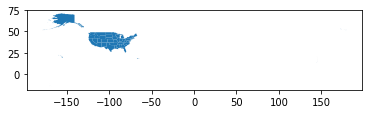

In [16]:
states.plot()

In [17]:
states.crs

{'init': 'epsg:4269'}

In [18]:
states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,01,01779775,0400000US01,01,AL,Alabama,00,131173688951,4593686489,"(POLYGON ((-88.04374299999999 30.517423, -88.0..."
1,02,01785533,0400000US02,02,AK,Alaska,00,1477946266785,245390495931,"(POLYGON ((-133.655819 55.625617, -133.624921 ..."
2,04,01779777,0400000US04,04,AZ,Arizona,00,294198560125,1027346486,"POLYGON ((-114.799683 32.593621, -114.809393 3..."
3,08,01779779,0400000US08,08,CO,Colorado,00,268429343790,1175112870,"POLYGON ((-109.060253 38.599328, -109.059541 3..."
4,09,01779780,0400000US09,09,CT,Connecticut,00,12542638347,1815476291,"POLYGON ((-73.72777499999999 41.100696, -73.69..."


In [23]:
statesbounds = states.bounds

In [24]:
statesbounds.head()

,minx,miny,maxx,maxy
0,-88.473227,30.221132,-84.891841,35.008028
1,-179.147340,51.219862,179.778470,71.352561
2,-114.814185,31.332177,-109.045223,37.004260
3,-109.060253,36.992426,-102.041524,41.003444
4,-73.727775,40.985171,-71.786994,42.050587


In [36]:
statesbounds = statesbounds.merge(states['STATEFP'],how = 'left',
                      left_on = statesbounds.index, 
                      right_on = states.index)

In [39]:
statesbounds = statesbounds.set_index('STATEFP')

In [42]:
statesbounds.drop('key_0', axis = 1, inplace = True)

In [43]:
statesbounds.head()

,minx,miny,maxx,maxy
STATEFP,,,,
01,-88.473227,30.221132,-84.891841,35.008028
02,-179.147340,51.219862,179.778470,71.352561
04,-114.814185,31.332177,-109.045223,37.004260
08,-109.060253,36.992426,-102.041524,41.003444
09,-73.727775,40.985171,-71.786994,42.050587


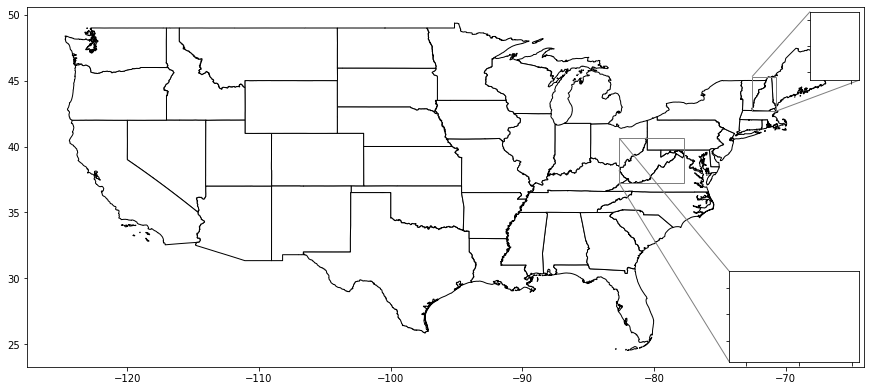

In [53]:
f, ax = plt.subplots(figsize=(15, 20))

# State layer
states.loc[(states['STATEFP'] != "60") &
           (states['STATEFP'] != "66") &
           (states['STATEFP'] != "69") &
           (states['STATEFP'] != "72") &
           (states['STATEFP'] != "78") &
           (states['STATEFP'] != "15") &
           (states['STATEFP'] != "02")      
          ].plot(ax=ax, edgecolor='black', color = 'white')

axins = zoomed_inset_axes(ax, 2, loc=1)
axins2 = zoomed_inset_axes(ax, 2, loc=4)

minx,miny,maxx,maxy =  statesbounds.loc['33']
axins.set_xlim(minx, maxx)
axins.set_ylim(miny, maxy)

minx,miny,maxx,maxy =  statesbounds.loc['54']
axins2.set_xlim(minx, maxx)
axins2.set_ylim(miny, maxy)


mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")
mark_inset(ax, axins2, loc1=2, loc2=3, fc="none", ec="0.5")

# Plot zoom window
#axins.plot()
#axins2.plot()

plt.setp(axins.get_xticklabels(), visible=False)
plt.setp(axins.get_yticklabels(), visible=False)
plt.setp(axins2.get_xticklabels(), visible=False)
plt.setp(axins2.get_yticklabels(), visible=False)

#ax.set_axis_off()
plt.show()